# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Loading Dataset

In [2]:
crimes_data = pd.read_csv("/content/crime_and_incarceration_by_state.csv")
crimes_data

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,2830.0,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,3133.0,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,684.0,720.0,5144.0,37282.0,9127.0,25657.0,2498.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,2005.0,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0


# Descriptive Analysis 

In [ ]:
#displaying the number of rows and columns of the dataset
print("Total number of Rows and Columns:",crimes_data.shape)

#displaying the data field values
print("\nColumn Names:\n",crimes_data.columns)

Total number of Rows and Columns: (816, 17)

Column Names:
 Index(['jurisdiction', 'includes_jails', 'year', 'prisoner_count',
       'crime_reporting_change', 'crimes_estimated', 'state_population',
       'violent_crime_total', 'murder_manslaughter', 'rape_legacy',
       'rape_revised', 'robbery', 'agg_assault', 'property_crime_total',
       'burglary', 'larceny', 'vehicle_theft'],
      dtype='object')


In [ ]:
#displaying the data types
print("\nData types:\n", crimes_data.dtypes)


Data types:
 jurisdiction               object
includes_jails               bool
year                        int64
prisoner_count              int64
crime_reporting_change     object
crimes_estimated           object
state_population          float64
violent_crime_total       float64
murder_manslaughter       float64
rape_legacy               float64
rape_revised              float64
robbery                   float64
agg_assault               float64
property_crime_total      float64
burglary                  float64
larceny                   float64
vehicle_theft             float64
dtype: object


In [ ]:
#information about the dataframe
crimes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            816 non-null    object 
 1   includes_jails          816 non-null    bool   
 2   year                    816 non-null    int64  
 3   prisoner_count          816 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  rape_revised            199 non-null    float64
 11  robbery                 799 non-null    float64
 12  agg_assault             799 non-null    float64
 13  property_crime_total    799 non-null    float64
 14  burglary                799 non-null    fl

# Statistical Analysis  

In [ ]:
#describing the dataset
round(crimes_data.describe(),1)

,year,prisoner_count,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
count,816.0,816.0,799.0,799.0,799.0,749.0,199.0,799.0,799.0,799.0,799.0,799.0,799.0
mean,2008.5,28606.0,6072322.2,26228.5,313.7,1788.3,2406.2,7696.8,16256.3,187800.6,40870.4,127912.3,19017.9
std,4.6,39556.9,6725499.8,33866.8,386.0,1865.4,2550.5,11107.5,20849.5,213850.3,47829.9,139434.6,30780.4
min,2001.0,1088.0,493754.0,496.0,5.0,99.0,110.0,43.0,270.0,8806.0,1689.0,6660.0,178.0
25%,2004.8,5698.0,1790025.5,5213.0,48.5,571.0,780.0,1106.0,3529.0,47497.5,9406.0,32765.5,4191.0
50%,2008.5,16915.0,4314113.0,15744.0,179.0,1238.0,1723.0,3933.0,10083.0,132773.0,27698.0,95079.0,10583.0
75%,2012.2,30920.5,6808844.5,31843.0,429.0,2092.0,2680.0,8702.0,20308.0,225957.5,47941.0,155688.0,20872.5
max,2016.0,216915.0,39296476.0,212867.0,2503.0,10198.0,13702.0,71142.0,136087.0,1227194.0,250521.0,731486.0,257543.0


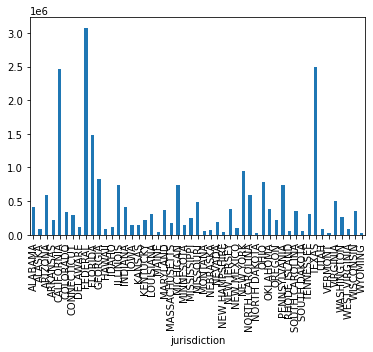

In [ ]:
crimes_data_group = crimes_data.groupby("jurisdiction")["prisoner_count"].sum()
crimes_data_group.plot(kind='bar')

In [ ]:
sample = crimes_data_group.to_csv("sample.csv")

# Data Cleaning

In [ ]:
#checking for null values in the each column of the dataset
for x in range(17):
    print("%-45s %10d" % (crimes_data.columns.values[x], crimes_data.iloc[:,x].isna().sum()))

jurisdiction                                           0
includes_jails                                         0
year                                                   0
prisoner_count                                         0
crime_reporting_change                                17
crimes_estimated                                      17
state_population                                      17
violent_crime_total                                   17
murder_manslaughter                                   17
rape_legacy                                           67
rape_revised                                         617
robbery                                               17
agg_assault                                           17
property_crime_total                                  17
burglary                                              17
larceny                                               17
vehicle_theft                                         17


# Detecting Outliers

Text(0.5, 1.0, 'Count of Prisoners per State')

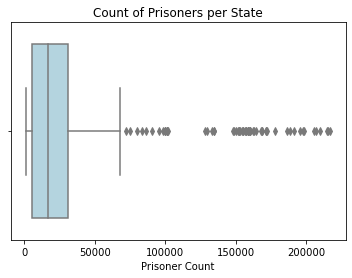

In [ ]:
#outliers - boxplot

#prisoner count
sns.boxplot(x = "prisoner_count", data=crimes_data, color="lightblue" )
plt.xlabel("Prisoner Count")
plt.title("Count of Prisoners per State")

Text(0.5, 1.0, 'Count of Violent Crime per State')

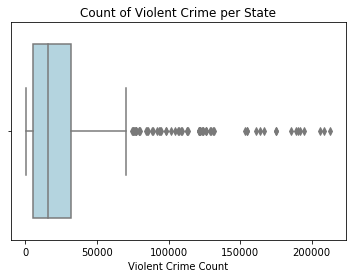

In [ ]:
#outliers - boxplot

#violent crime total
sns.boxplot(x = "violent_crime_total", data=crimes_data, color="lightblue" )
plt.xlabel("Violent Crime Count")
plt.title("Count of Violent Crime per State")

/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


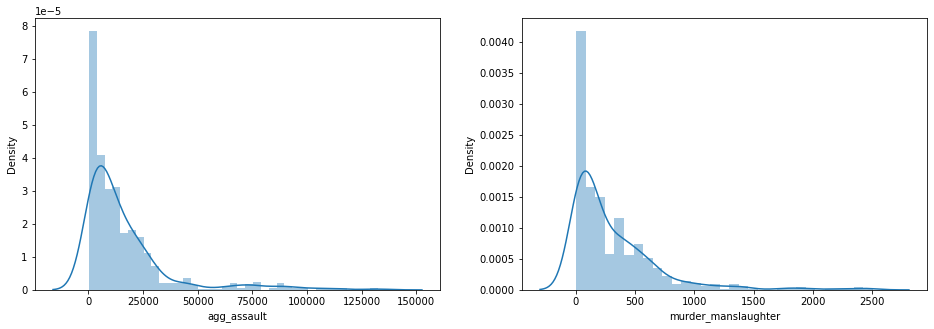

In [ ]:
#distribution plot


#plotting distribution for the features
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(crimes_data['agg_assault'])
plt.subplot(1,2,2)
sns.distplot(crimes_data['murder_manslaughter'])
plt.show()


# Cleaning Data

In [ ]:
#checking for datatype of each variable

crimes_data.dtypes

jurisdiction               object
includes_jails               bool
year                        int64
prisoner_count              int64
crime_reporting_change     object
crimes_estimated           object
state_population          float64
violent_crime_total       float64
murder_manslaughter       float64
rape_legacy               float64
rape_revised              float64
robbery                   float64
agg_assault               float64
property_crime_total      float64
burglary                  float64
larceny                   float64
vehicle_theft             float64
dtype: object

In [ ]:
#data cleaning

#dropping rape_revised column as it has maximum null values of the whole data
crimes_data = crimes_data.drop("rape_revised", axis = 1)

In [ ]:
crimes_data

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,VIRGINIA,False,2016,29882,False,False,8414380.0,18495.0,482.0,NaN,4826.0,10357.0,157292.0,20159.0,127285.0,9848.0
812,WASHINGTON,False,2016,17228,False,False,7280934.0,22101.0,195.0,NaN,5649.0,13124.0,254994.0,49249.0,173423.0,32322.0
813,WEST VIRGINIA,False,2016,5899,False,False,1828637.0,6633.0,85.0,NaN,720.0,5144.0,37282.0,9127.0,25657.0,2498.0
814,WISCONSIN,False,2016,23163,False,False,5772917.0,17716.0,232.0,NaN,4707.0,10772.0,111911.0,19498.0,82455.0,9958.0


In [ ]:
#remaining all row values are null for rows with missing values, hence dropping all those 17 values

crimes_data = crimes_data.dropna(subset=['crime_reporting_change'])
crimes_data.shape

(799, 16)

In [ ]:
#checking for null values in the each column of the dataset
for x in range(16):
    print("%-45s %10d" % (crimes_data.columns.values[x], crimes_data.iloc[:,x].isna().sum()))

jurisdiction                                           0
includes_jails                                         0
year                                                   0
prisoner_count                                         0
crime_reporting_change                                 0
crimes_estimated                                       0
state_population                                       0
violent_crime_total                                    0
murder_manslaughter                                    0
rape_legacy                                           50
robbery                                                0
agg_assault                                            0
property_crime_total                                   0
burglary                                               0
larceny                                                0
vehicle_theft                                          0


/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


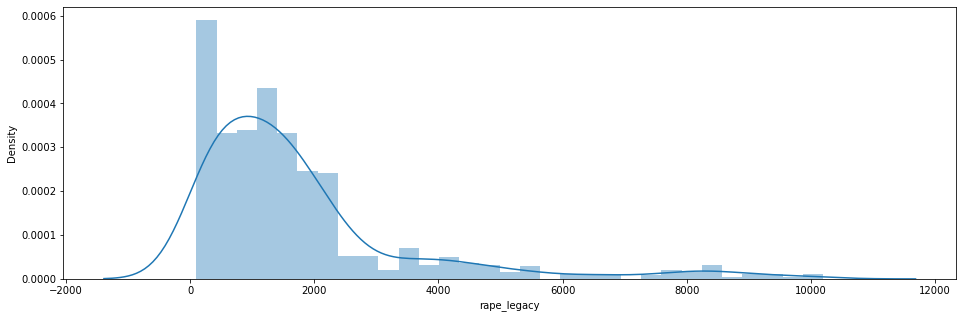

In [ ]:
#distribution plot for rape_legacy

plt.figure(figsize=(16,5))
sns.distplot(crimes_data['rape_legacy'])
plt.show()

In [ ]:
#input for rape_legacy fied value

#missing data - approx 20%
#data is skewed
#input missing values with median


crimes_data['rape_legacy'] = crimes_data['rape_legacy'].fillna(crimes_data['rape_legacy'].median())
print("Imputed Values!")

Imputed Values!


/var/folders/bb/k2_2kfvd3wg4vk88jcpx0tp00000gn/T/ipykernel_1901/577435224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_data['rape_legacy'] = crimes_data['rape_legacy'].fillna(crimes_data['rape_legacy'].median())


In [ ]:
#checking for null values in the each column of the dataset
for x in range(16):
    print("%-45s %10d" % (crimes_data.columns.values[x], crimes_data.iloc[:,x].isna().sum()))

jurisdiction                                           0
includes_jails                                         0
year                                                   0
prisoner_count                                         0
crime_reporting_change                                 0
crimes_estimated                                       0
state_population                                       0
violent_crime_total                                    0
murder_manslaughter                                    0
rape_legacy                                            0
robbery                                                0
agg_assault                                            0
property_crime_total                                   0
burglary                                               0
larceny                                                0
vehicle_theft                                          0


# Correlation Plot

Text(0.5, 1.0, 'Correlation Plot')

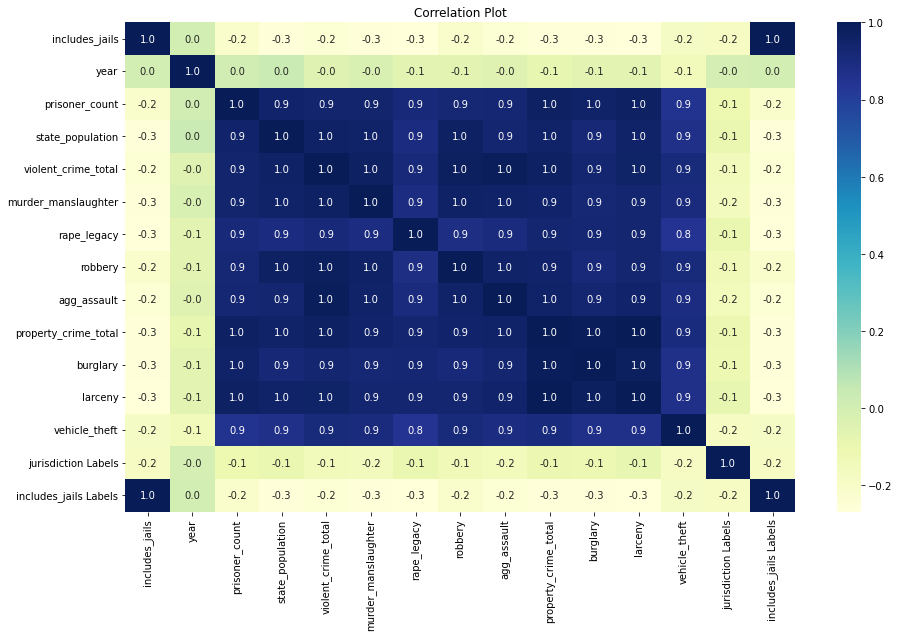

In [ ]:
# correlation plot

plt.figure(figsize = (15,9))
ax = plt.subplot()
sns.heatmap(crimes_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot')

# Feature Selection & Extraction

/Users/jyothsnaakula/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (799, 16)
    Loaded train data. Shape = (799, 16)
No test data filename given...
####################

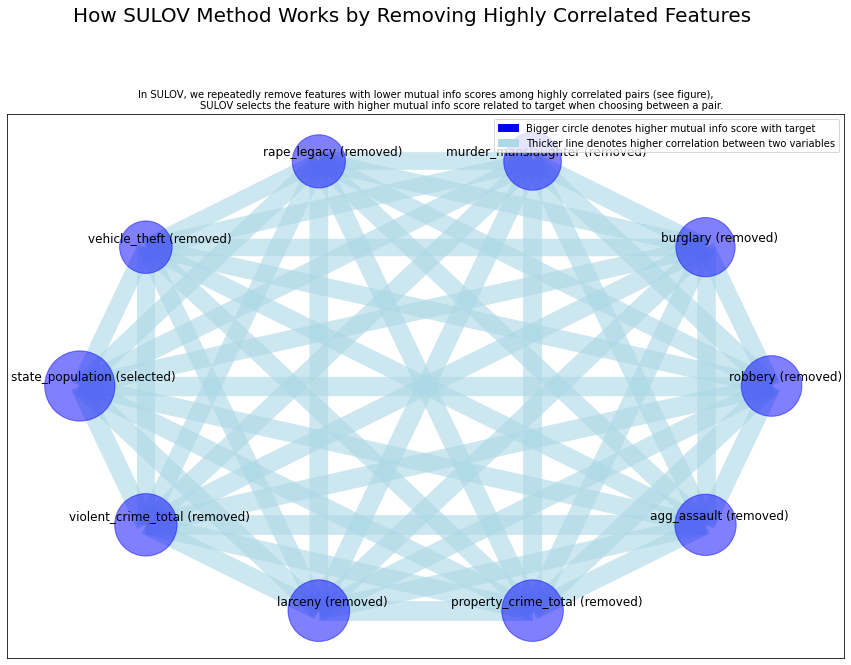

Time taken for SULOV method = 0 seconds
    Adding 4 categorical variables to reduced numeric variables  of 1
Final list of selected vars after SULOV = 5
Readying dataset for Recursive XGBoost by converting all features to numeric...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after pruning = (799, 15)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 5 
    XGBoost version: 1.5.1
Number of booster rounds = 100
        using 5 variables...
            Time taken for regular XGBoost feature selection = 0 seconds
        using 3 variables...
            Time taken for regul

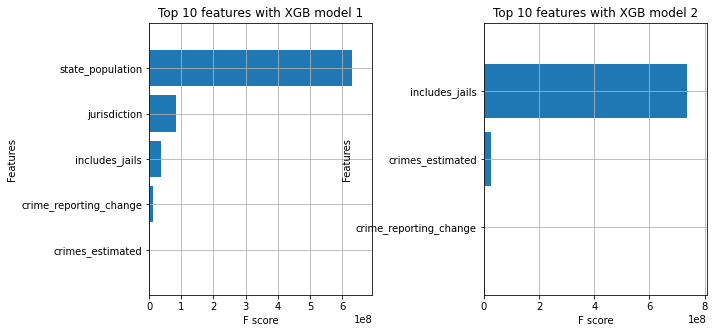

            Total time taken for XGBoost feature selection = 0 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 5 important features:
['state_population', 'jurisdiction', 'includes_jails', 'crime_reporting_change', 'crimes_estimated']

    Time taken for feature selection = 1 seconds
Returning 2 dataframes: dataname and test_data with 5 important features.


In [ ]:
#automatic feature extraction
from featurewiz import featurewiz

target = 'prisoner_count'

features, train = featurewiz(crimes_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
 !pip install featurewiz --ignore-installed --no-deps
 !pip install xlrd --ignore-installed --no-deps 

  Using cached featurewiz-0.1.996-py3-none-any.whl (111 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [ ]:
 !pip install Pillow==9.0.0
 !pip install lazytransform

     |████████████████████████████████| 56 kB 2.3 MB/s eta 0:00:011
  Using cached imbalanced_ensemble-0.1.7-py2.py3-none-any.whl (268 kB)
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Using cached category_encoders-2.5.0-py2.py3-none-any.whl (69 kB)
  Using cached category_encoders-2.4.1-py2.py3-none-any.whl (80 kB)
  Using cached category_encoders-2.4.0-py2.py3-none-any.whl (86 kB)
INFO: pip is looking at multiple versions of lazytransform to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 54 kB 4.5 MB/s eta 0:00:01
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 54 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 6.7 MB/s  eta 0:00

In [ ]:
print(features)

['state_population', 'jurisdiction', 'includes_jails', 'crime_reporting_change', 'crimes_estimated']


# Label Encoding

In [ ]:
labelencoder = LabelEncoder()
crimes_data['jurisdiction Labels'] = labelencoder.fit_transform(crimes_data["jurisdiction"])
crimes_data['includes_jails Labels'] = labelencoder.fit_transform(crimes_data["includes_jails"])
crimes_data.head(10)

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,jurisdiction Labels,includes_jails Labels
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,0,0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,514.0,2681.0,23160.0,3847.0,16695.0,2618.0,1,1
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,2,0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,3,0
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,4,0
6,COLORADO,False,2001,17278,False,False,4430989.0,15492.0,158.0,1930.0,3555.0,9849.0,170887.0,28533.0,121360.0,20994.0,5,0
7,CONNECTICUT,True,2001,17507,False,False,3434602.0,11492.0,105.0,639.0,4183.0,6565.0,95299.0,17159.0,65762.0,12378.0,6,1
8,DELAWARE,True,2001,6841,False,False,796599.0,4868.0,23.0,420.0,1156.0,3269.0,27399.0,5144.0,19476.0,2779.0,7,1
9,FLORIDA,False,2001,72404,False,False,16373330.0,130713.0,874.0,6641.0,32867.0,90331.0,782517.0,176052.0,516548.0,89917.0,8,0
10,GEORGIA,False,2001,45937,False,False,8405677.0,41671.0,598.0,2180.0,14402.0,24491.0,347872.0,71799.0,238484.0,37589.0,9,0


In [ ]:
#new dataframe for training model

new_crimes_data = pd.DataFrame()

new_crimes_data['jurisdiction'] = crimes_data['jurisdiction Labels']
new_crimes_data['includes_jails'] = crimes_data['includes_jails Labels']
new_crimes_data['state_population'] = crimes_data['state_population']
new_crimes_data['violent_crime_total'] = crimes_data['violent_crime_total']
new_crimes_data['murder_manslaughter'] = crimes_data['murder_manslaughter']
new_crimes_data['agg_assault'] = crimes_data['agg_assault']

new_crimes_data.head(10)

,jurisdiction,includes_jails,state_population,violent_crime_total,murder_manslaughter,agg_assault
1,0,0,4468912.0,19582.0,379.0,12250.0
2,1,1,633630.0,3735.0,39.0,2681.0
3,2,0,5306966.0,28675.0,400.0,17889.0
4,3,0,2694698.0,12190.0,148.0,8969.0
5,4,0,34600463.0,212867.0,2206.0,136087.0
6,5,0,4430989.0,15492.0,158.0,9849.0
7,6,1,3434602.0,11492.0,105.0,6565.0
8,7,1,796599.0,4868.0,23.0,3269.0
9,8,0,16373330.0,130713.0,874.0,90331.0
10,9,0,8405677.0,41671.0,598.0,24491.0


In [ ]:
new_crimes_data.columns

Index(['jurisdiction', 'includes_jails', 'state_population',
       'violent_crime_total', 'murder_manslaughter', 'agg_assault'],
      dtype='object')

In [ ]:
#extracting features and labels from the dataset

x = new_crimes_data
y = crimes_data['prisoner_count']

In [ ]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(639, 6)
(160, 6)


# Linear Regression Model

In [ ]:
#linear regression model

linear_regressionmodel = LinearRegression()
linear_regressionmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predict the result for the model

predicted_value_LR = linear_regressionmodel.predict(X_test)

In [ ]:
#accuracy of the LR for training and testing set

print('Accuracy of Linear Regressor model on training set: {:.2f}'.format(linear_regressionmodel.score(X_train, y_train)))
print('Accuracy of Linear Regressor model on test set:     {:.2f}'.format(linear_regressionmodel.score(X_test, y_test)))

result_LR = linear_regressionmodel.score(X_test, y_test)
result_LR = round(result_LR,4)
result_LR

Accuracy of Linear Regressor model on training set: 0.92
Accuracy of Linear Regressor model on test set:     0.91


0.9101

# Model Evaluation

In [ ]:
#evaluating the model
print("Model Evaluation of Linear Regression.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_LR),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_LR),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_LR)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_LR))

Model Evaluation of Linear Regression.
Mean Absolute Error: 5857.4
Mean Squared Error: 94183008.5
Root Mean Squared Error: 9704.8
R-Squared value: 0.910075669033999


# Decision Tree Regressor Model

In [ ]:
#decision tree regressor

decisiontree_model = DecisionTreeRegressor(max_depth=5)
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
#predict the result for the model

predicted_value_dt = decisiontree_model.predict(X_test)

In [ ]:
#accuracy of the DT for training and testing set

print('Accuracy of Decision Tree Regressor model on training set: {:.2f}'.format(decisiontree_model.score(X_train, y_train)))
print('Accuracy of Decision Tree Regressor model on test set:     {:.2f}'.format(decisiontree_model.score(X_test, y_test)))

result_DT = decisiontree_model.score(X_test, y_test)
result_DT = round(result_DT,3)
result_DT

Accuracy of Decision Tree Regressor model on training set: 0.99
Accuracy of Decision Tree Regressor model on test set:     0.99


0.985

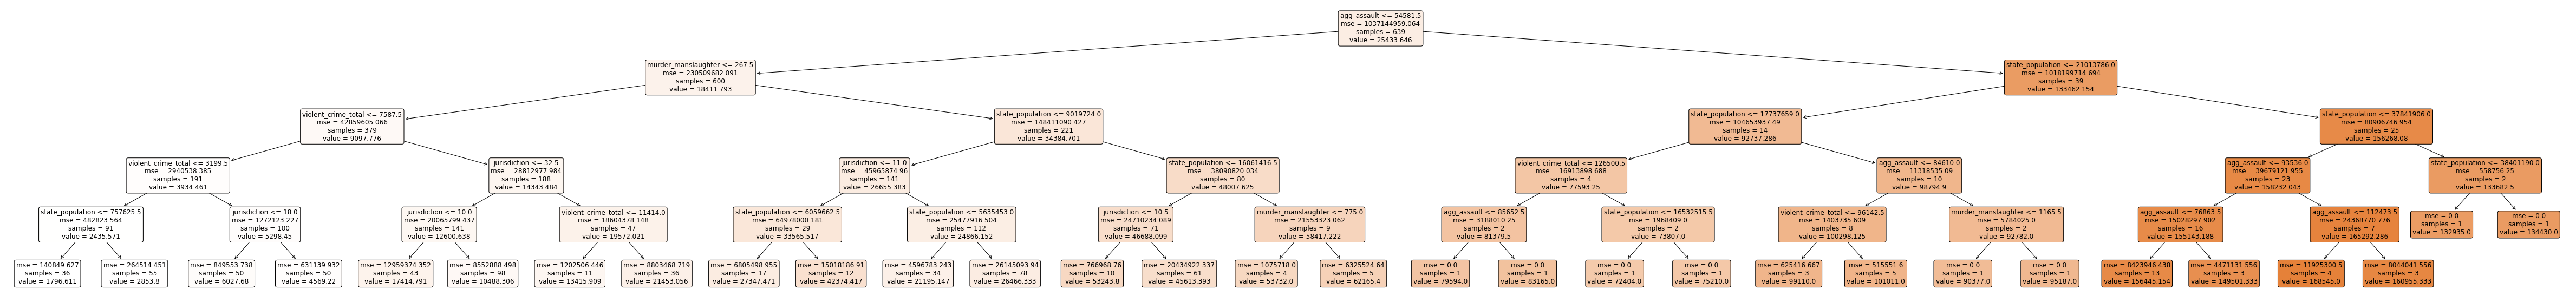

In [ ]:
#plotting the decision tree

feature_names = x.columns

plt.figure(figsize=(85,10))
a = tree.plot_tree(decisiontree_model,
                   feature_names = feature_names,
                   class_names = crimes_data['prisoner_count'],
                   rounded = True,
                   filled = True,
                   fontsize=12)
plt.show()

# Feature Importance

<AxesSubplot:>

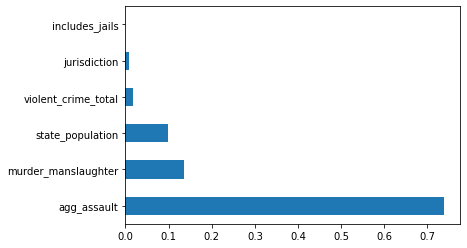

In [ ]:
#feature importance for decision tree regressor

(pd.Series(decisiontree_model.feature_importances_, index=x.columns)
   .nlargest(8)
   .plot(kind='barh'))

# Model Evaluation

In [ ]:
#evaluating the model
print("Model Evaluation of Decision Tree Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_dt),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_dt),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_dt)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_dt))

Model Evaluation of Decision Tree Regressor.
Mean Absolute Error: 2402.5
Mean Squared Error: 15700519.7
Root Mean Squared Error: 3962.4
R-Squared value: 0.9850094114707117


# Random Forest Regressor Model

In [ ]:
#random forest regressor

randomforest_model = RandomForestRegressor(n_estimators = 5000, max_depth=5)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5000)

In [ ]:
#predict the result for the model

predicted_value_rf = randomforest_model.predict(X_test)

In [ ]:
#accuracy of the RF for training and testing set

print('Accuracy of Random Forest Regressor model on training set: {:.2f}'.format(randomforest_model.score(X_train, y_train)))
print('Accuracy of Random Forest Regressor model on test set:     {:.2f}'.format(randomforest_model.score(X_test, y_test)))

result_RF = randomforest_model.score(X_test, y_test)
result_RF = round(result_RF,3)
result_RF

Accuracy of Random Forest Regressor model on training set: 0.99
Accuracy of Random Forest Regressor model on test set:     0.99


0.988

# Feature Importance

<AxesSubplot:>

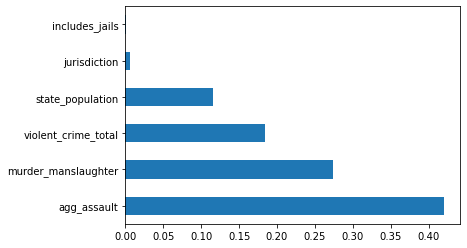

In [ ]:
#feature importance for random forest regressor

(pd.Series(randomforest_model.feature_importances_, index=x.columns)
   .nlargest(8)
   .plot(kind='barh'))

# Model Evaluation

In [ ]:
#evaluating the model
print("Model Evaluation of Random Forest Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_rf),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_rf),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_rf)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_rf))

Model Evaluation of Random Forest Regressor.
Mean Absolute Error: 2302.4
Mean Squared Error: 12757253.4
Root Mean Squared Error: 3571.7
R-Squared value: 0.9878195919466506


# Crime Data Analysis

In [ ]:
crimesdata_profilereport = crimes_data.profile_report(title='Crimes Data Analysis Report', explorative = True)
crimesdata_profilereport

In [ ]:
#saving the profile report 
crimesdata_profilereport.to_file(output_file="Crimes Data Analysis Report.html")

# Dash WebApp


In [3]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 325 kB 4.6 MB/s 
     |████████████████████████████████| 102 kB 66.8 MB/s 
     |████████████████████████████████| 9.9 MB 73.5 MB/s 
     |████████████████████████████████| 679 kB 56.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 4.7 MB 57.8 MB/s 
     |████████████████████████████████| 296 kB 59.9 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0105d4e8fa362a16d43291a14d0fe2a16ad9046f9649cf9ead009a6f7a893d7a
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
  Attempting uninstall: statsmodels
    Found e

In [4]:
!pip install dash-dangerously-set-inner-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dash-dangerously-set-inner-html: filename=dash_dangerously_set_inner_html-0.0.2-py3-none-any.whl size=4757 sha256=778cbf130094b73278719157497c9f179c4e87ea0e0d21013a0c4e6619d332ec
  Stored in directory: /root/.cache/pip/wheels/25/dc/4d/d63cc56587601413aa2e3654ea1bc0e8d7944c23b73bb56819
Successfully built dash-dangerously-set-inner-html


In [5]:
%%sh
pip install dash --upgrade
pip install -q dash_core_components
pip install -q dash_html_components
pip install -q dash_table

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
%%sh
# get ngrok
curl -O https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.1M  100 13.1M    0     0  19.9M      0 --:--:-- --:--:-- --:--:-- 19.9M


In [7]:
%%sh
./ngrok authtoken 2IyXYyYubQC6oXYMEBEcs79cOyk_gCTjFxJEYiYvVNtmFzzV

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
#Crime and Incarceration - Report in Web App
%%writefile dash_app.py

import pandas as pd
from pandas_profiling import ProfileReport
import dash
from dash import html
import dash_dangerously_set_inner_html

# Creating the Report
df = pd.read_csv(
    "/content/crime_and_incarceration_by_state.csv"
)
profile = ProfileReport(df, title="Crime and Incarceration - Report")
text_raw = profile.to_html()

# Creating the Dash app

app = dash.Dash(__name__)

app.layout = html.Div(
    [dash_dangerously_set_inner_html.DangerouslySetInnerHTML(text_raw)]
)

if __name__ == "__main__":
    app.run_server(debug=True)

Writing dash_app.py


In [8]:
%%writefile dash_app.py

from dash import Dash, dcc, html, Input, Output
import plotly.express as px

import pandas as pd

df = pd.read_csv('/content/crime_and_incarceration_by_state.csv')

app = Dash(__name__)

app.layout = html.Div(
  [
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['year'].min(),
        df['year'].max(),
        step=None,
        value=df['year'].min(),
        marks={str(year): str(year) for year in df['year'].unique()},
        id='year-slider'
    )
    
])


@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.year == selected_year]

    #fig = px.line( filtered_df, x="jurisdiction", y ="prisoner_count" , title="Prisoner Count by State (2001-2016)")
    #fig = px.line( filtered_df, x="jurisdiction", y ="vehicle_theft" , title="Vehicle Theft by State (2001-2016)")
    fig = px.line( filtered_df, x="jurisdiction", y ="violent_crime_total" , title="Violent_crime_total by State (2001-2016)")
    #fig = px.line( filtered_df, x="jurisdiction", y ="murder_manslaughter" , title="Murder_manslaughter by State (2001-2016)")
    #fig = px.line( filtered_df, x="jurisdiction", y ="rape_legacy" , title="Rape_legacy by State (2001-2016)")
    #fig = px.line( filtered_df, x="jurisdiction", y ="robbery" , title="Robbery by State (2001-2016)")
    #fig = px.line( filtered_df, x="jurisdiction", y ="property_crime_total" , title="Property_Crime by State (2001-2016)")

    fig.update_layout(transition_duration=500)
    

    return fig


if __name__ == '__main__':
    app.run_server(debug=True)




Writing dash_app.py


In [9]:
# launch ngrok
get_ipython().system_raw('./ngrok http 8050 &')

In [10]:
%%sh
# get url with ngrok
curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://75d2-34-132-105-235.ngrok.io


In [ ]:
!python dash_app.py

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "dash_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
